# Project – Analyzing the trends of COVID-19 with Python

Problem Statement:
Given data about COVID 19 patients, write code to visualize the impact and analyze the trend
of rate of infection and recovery as well as make predictions about the number of cases
expected a week in future based on the current trends

Guidelines:
• Use pandas to accumulate data from multiple data files

• Use plotly (visualization library) to create interactive visualizations

• Use Facebook prophet library to make time series models

• Visualize the prediction by combining these technologies

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [7]:
df=pd.read_csv("covid_19_clean_complete.csv",parse_dates=["Date"])
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [12]:
df.head(30)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.060800,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.416100,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.069100,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.473500,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.868800,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [10]:
df["Active"]=df["Confirmed"]-df["Deaths"]-df["Recovered"]

In [13]:
#Renaming the columns   --------------optional step
df.rename(columns={"Date":"date",
                   "Province/State":"state",
                   "Country/Region":"country",
                   "Lat":"lat","Long":"long",
                   "Confirmed":"confirmed",
                   "Deaths":"deaths",
                   "Recovered":"recovered",
                   "WHO Region":"who",
                   "Active":"active"
                   },inplace = True)

In [14]:
df

,state,country,lat,long,date,confirmed,deaths,recovered,active,who
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [15]:
top=df[df["date"]=="2020-01-22"]
top

,state,country,lat,long,date,confirmed,deaths,recovered,active,who
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
256,NaN,Sao Tome and Principe,0.186400,6.613100,2020-01-22,0,0,0,0,Africa
257,NaN,Yemen,15.552727,48.516388,2020-01-22,0,0,0,0,Eastern Mediterranean
258,NaN,Comoros,-11.645500,43.333300,2020-01-22,0,0,0,0,Africa
259,NaN,Tajikistan,38.861000,71.276100,2020-01-22,0,0,0,0,Europe


In [18]:
top.groupby("country")["confirmed","active","deaths"].sum().reset_index()

,country,confirmed,active,deaths
0,Afghanistan,0,0,0
1,Albania,0,0,0
2,Algeria,0,0,0
3,Andorra,0,0,0
4,Angola,0,0,0
5,Antigua and Barbuda,0,0,0
6,Argentina,0,0,0
7,Armenia,0,0,0
8,Australia,0,0,0
9,Austria,0,0,0


In [19]:
df["date".max()]

Timestamp('2020-07-27 00:00:00')

In [23]:
top=df[df["date"]=="2020-07-27"]
top

,state,country,lat,long,date,confirmed,deaths,recovered,active,who
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [21]:
world = top.groupby("country")["confirmed","active","deaths","recovered"].sum().reset_index()
world

,country,confirmed,active,deaths,recovered
0,Afghanistan,36263,9796,1269,25198
1,Albania,4880,1991,144,2745
2,Algeria,27973,7973,1163,18837
3,Andorra,907,52,52,803
4,Angola,950,667,41,242
...,...,...,...,...,...
182,West Bank and Gaza,10621,6791,78,3752
183,Western Sahara,10,1,1,8
184,Yemen,1691,375,483,833
185,Zambia,4552,1597,140,2815


In [27]:
# Top countries having highest no. of active case
#choropleth

figure = px.choropleth(world,locations="country",
                       locationmode = "country names", color="active",
                       hover_name="country",range_color=[1,20000],
                       color_continuous_scale="greens",
                       title="Countries with Active Cases")
figure.show()

In [28]:
total_cases = df.groupby("date")['date','confirmed'].sum().reset_index()

In [29]:
total_cases

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

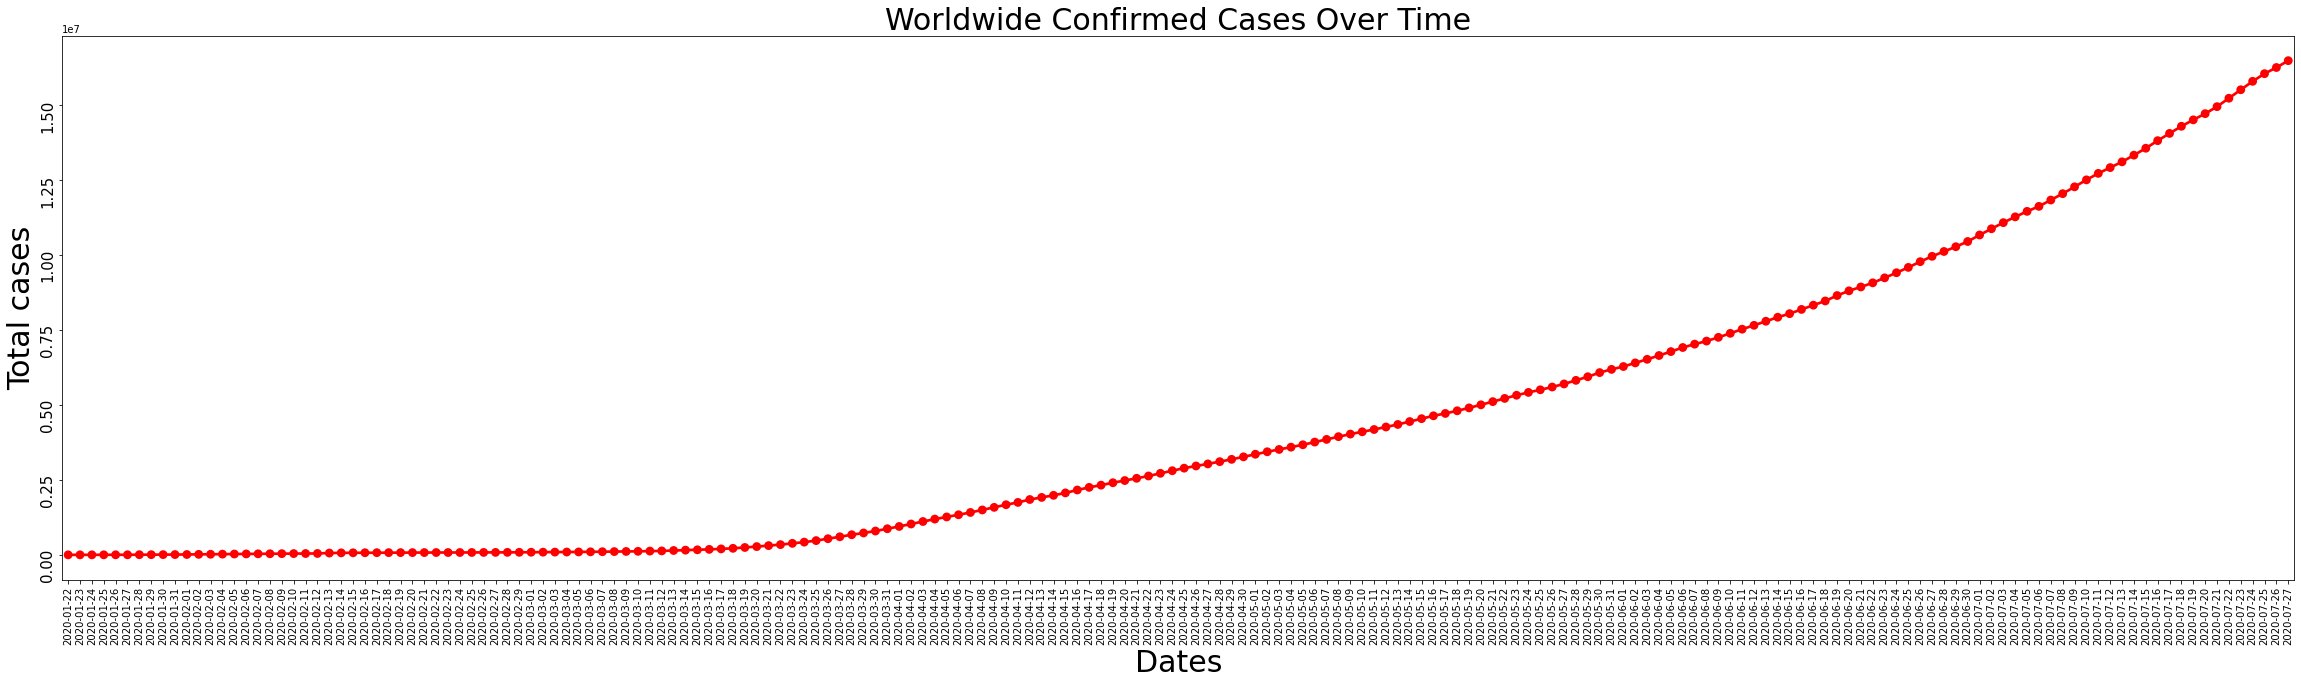

In [45]:
# Observe the trend in the confirmed cases
# TREND OF HOW COVID SPREAD
plt.figure(figsize=(40,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation =90,fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total cases",fontsize=30)
plt.title("Worldwide Confirmed Cases Over Time",fontsize=30)
ax = sns.pointplot(x=total_cases.date.dt.date, y=total_cases.confirmed, color='r')
ax.set(xlabel="Dates",ylabel="Total cases")

In [55]:
# top countries with highest number of actives cases

top_actives = top.groupby(by="country")["active"].sum().sort_values(ascending=False).reset_index()
top_actives

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
...,...,...
182,Holy See,0
183,San Marino,0
184,Brunei,0
185,Dominica,0


In [54]:
top_actives.head(5)

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097


In [ ]:
# US
# Brazil
# India
# UK
# Russia

In [57]:
top_actives=top_actives.head(20)

[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

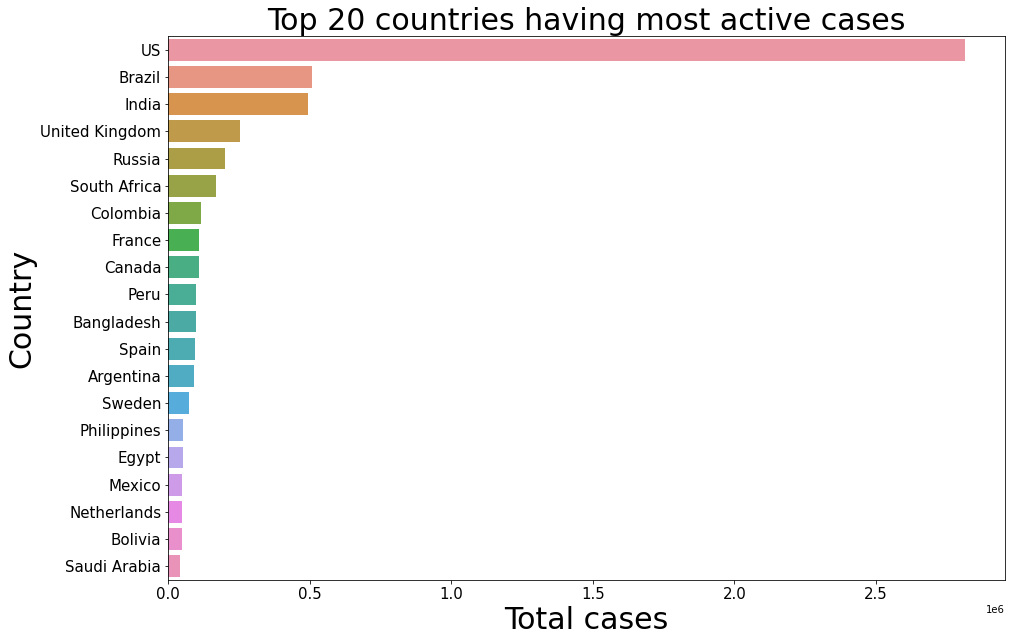

In [58]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most active cases",fontsize=30)
ax = sns.barplot(x=top_actives.active, y=top_actives.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [59]:
# top 20 countries with highest number of Death cases

top_deaths = top.groupby(by="country")["deaths"].sum().sort_values(ascending=False).head(20).reset_index()
top_deaths

,country,deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

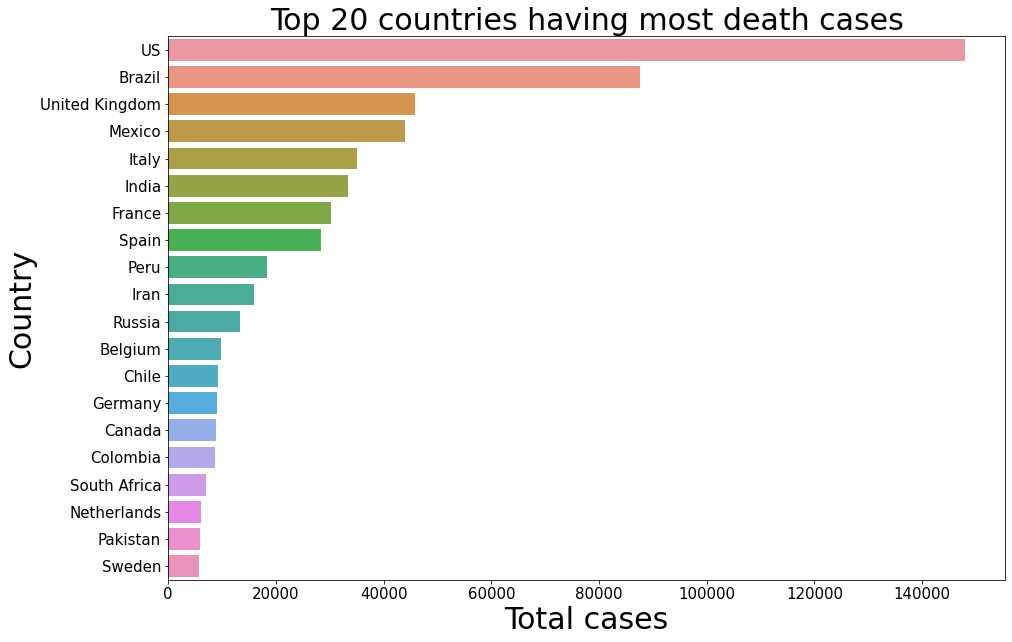

In [60]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most death cases",fontsize=30)
ax = sns.barplot(x=top_deaths.deaths, y=top_deaths.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [61]:
# top 5 countries
# US
# Brazil
# UK
# Mexico
# Italy

In [62]:
# Home work is to do the same analysis for confirmed cases and the recovered

In [ ]:
# after analysing above cases we found top countries
BRazil
US
UK
India
Russia 

In [64]:
brazil = df[df.country == "Brazil"]
brazil = brazil.groupby(by = "date")["recovered","deaths","confirmed","active"].sum().reset_index()
brazil

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1620313,84082,2287475,583080
184,2020-07-24,1693214,85238,2343366,564914
185,2020-07-25,1785359,86449,2394513,522705
186,2020-07-26,1812913,87004,2419091,519174


In [66]:
us = df[df.country == "US"]
us = us.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()
us = us.iloc[33:].reset_index().drop("index",axis=1)
us

,date,recovered,deaths,confirmed,active
0,2020-02-24,5,0,15,10
1,2020-02-25,6,0,15,9
2,2020-02-26,6,0,15,9
3,2020-02-27,6,0,16,10
4,2020-02-28,7,0,16,9
...,...,...,...,...,...
150,2020-07-23,1233269,144430,4038816,2661117
151,2020-07-24,1261624,145560,4112531,2705347
152,2020-07-25,1279414,146465,4178970,2753091
153,2020-07-26,1297863,146935,4233923,2789125


In [67]:
uk = df[df.country == "United Kingdom"]
uk = uk.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()
uk = uk.iloc[10:].reset_index().drop("index",axis=1)
uk


,date,recovered,deaths,confirmed,active
0,2020-02-01,0,0,2,2
1,2020-02-02,0,0,2,2
2,2020-02-03,0,0,8,8
3,2020-02-04,0,0,8,8
4,2020-02-05,0,0,9,9
...,...,...,...,...,...
173,2020-07-23,1425,45639,298731,251667
174,2020-07-24,1425,45762,299500,252313
175,2020-07-25,1427,45823,300270,253020
176,2020-07-26,1434,45837,301020,253749


In [68]:
india = df[df.country == "India"]
india= india.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()
india= india.iloc[9:].reset_index().drop("index",axis=1)
india

,date,recovered,deaths,confirmed,active
0,2020-01-31,0,0,1,1
1,2020-02-01,0,0,1,1
2,2020-02-02,0,0,2,2
3,2020-02-03,0,0,3,3
4,2020-02-04,0,0,3,3
...,...,...,...,...,...
174,2020-07-23,817209,30601,1288108,440298
175,2020-07-24,849432,31358,1337024,456234
176,2020-07-25,885573,32060,1385635,468002
177,2020-07-26,917568,32771,1435616,485277


In [69]:
Russia=df[df.country=='Russia']
Russia=Russia.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
Russia=Russia.iloc[10:].reset_index().drop('index',axis=1)
Russia

,date,recovered,deaths,confirmed,active
0,2020-02-01,0,0,2,2
1,2020-02-02,0,0,2,2
2,2020-02-03,0,0,2,2
3,2020-02-04,0,0,2,2
4,2020-02-05,0,0,2,2
...,...,...,...,...,...
173,2020-07-23,579295,12873,793720,201552
174,2020-07-24,587728,13026,799499,198745
175,2020-07-25,596064,13172,805332,196096
176,2020-07-26,599172,13249,811073,198652


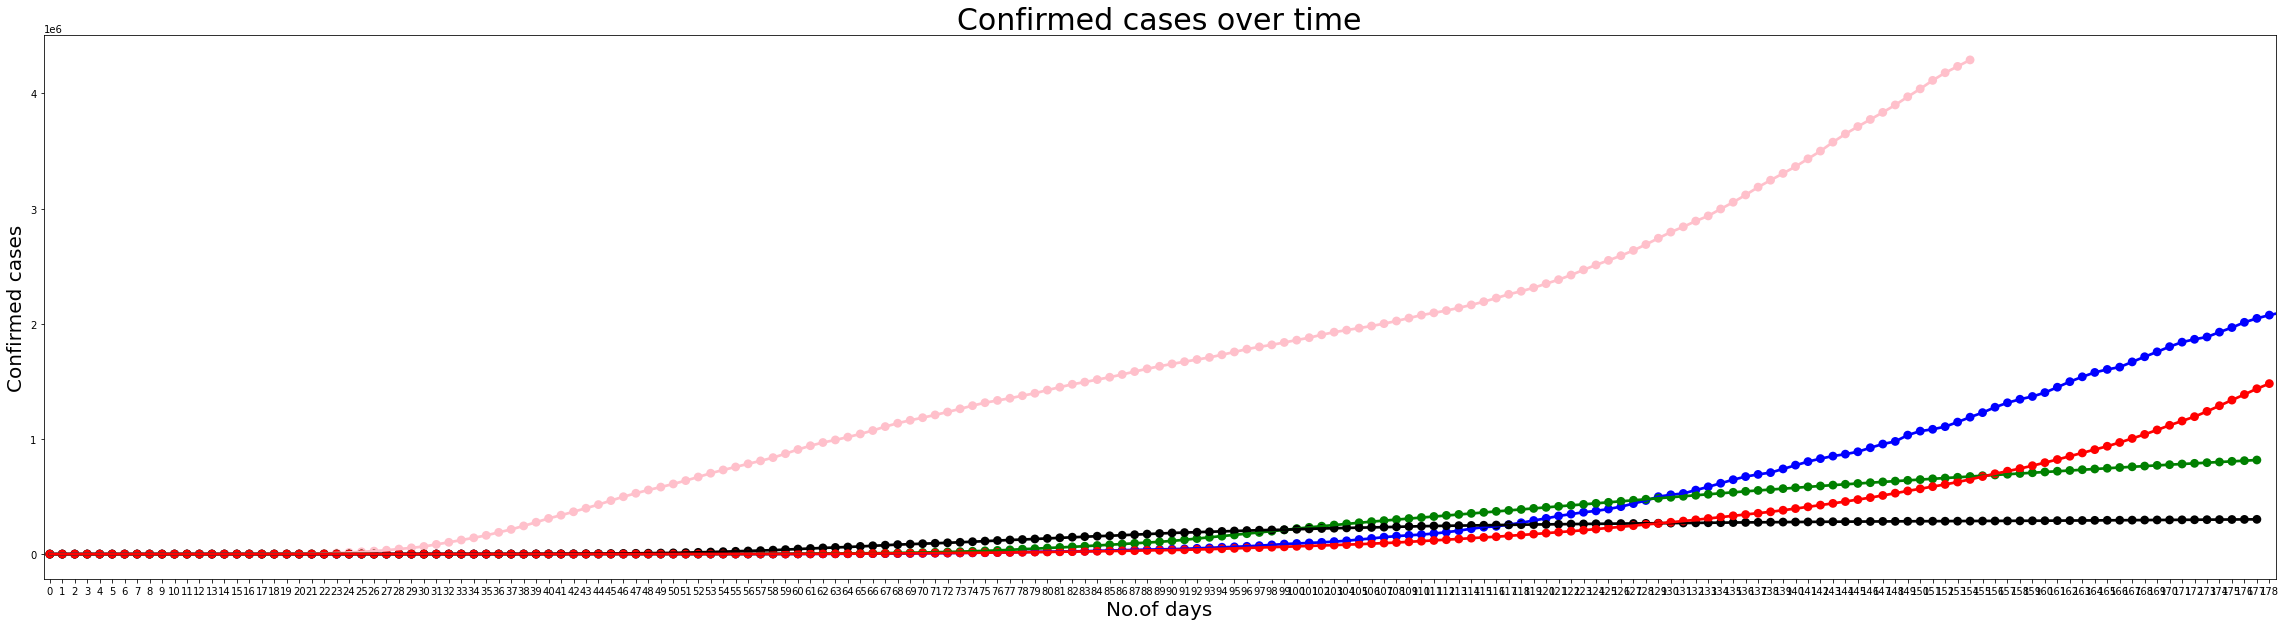

In [70]:
# confirmed cases trend in top 5 countries
plt.figure(figsize=(40,10))
sns.pointplot(brazil.index,brazil.confirmed,color="Blue")
sns.pointplot(us.index,us.confirmed,color="Pink")
sns.pointplot(Russia.index,Russia.confirmed,color="Green")
sns.pointplot(uk.index,uk.confirmed,color="black")
sns.pointplot(india.index,india.confirmed,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Confirmed cases',fontsize=20)
plt.title('Confirmed cases over time',fontsize=30)
plt.show()

In [ ]:
# In US we can see the drastically increasing number of confirmed cases 

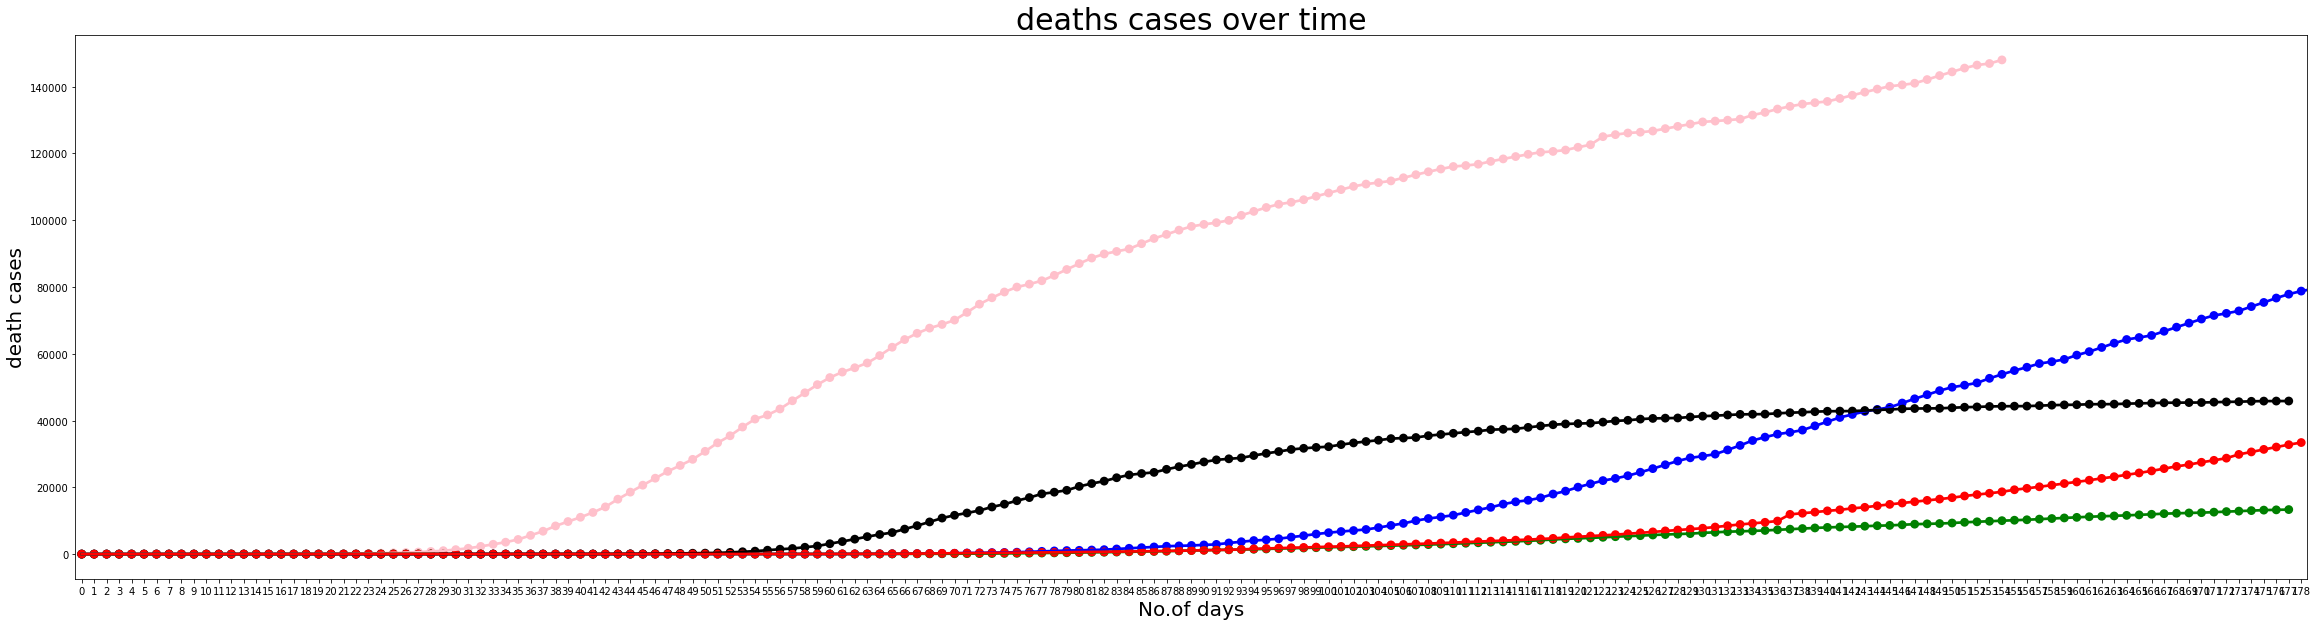

In [71]:
# Death cases trend in top 5 countries
plt.figure(figsize=(40,10))
sns.pointplot(brazil.index,brazil.deaths,color="Blue")
sns.pointplot(us.index,us.deaths,color="Pink")
sns.pointplot(Russia.index,Russia.deaths,color="Green")
sns.pointplot(uk.index,uk.deaths,color="black")
sns.pointplot(india.index,india.deaths,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('death cases',fontsize=20)
plt.title('deaths cases over time',fontsize=30)
plt.show()

In [72]:
# Death case of US is highest 

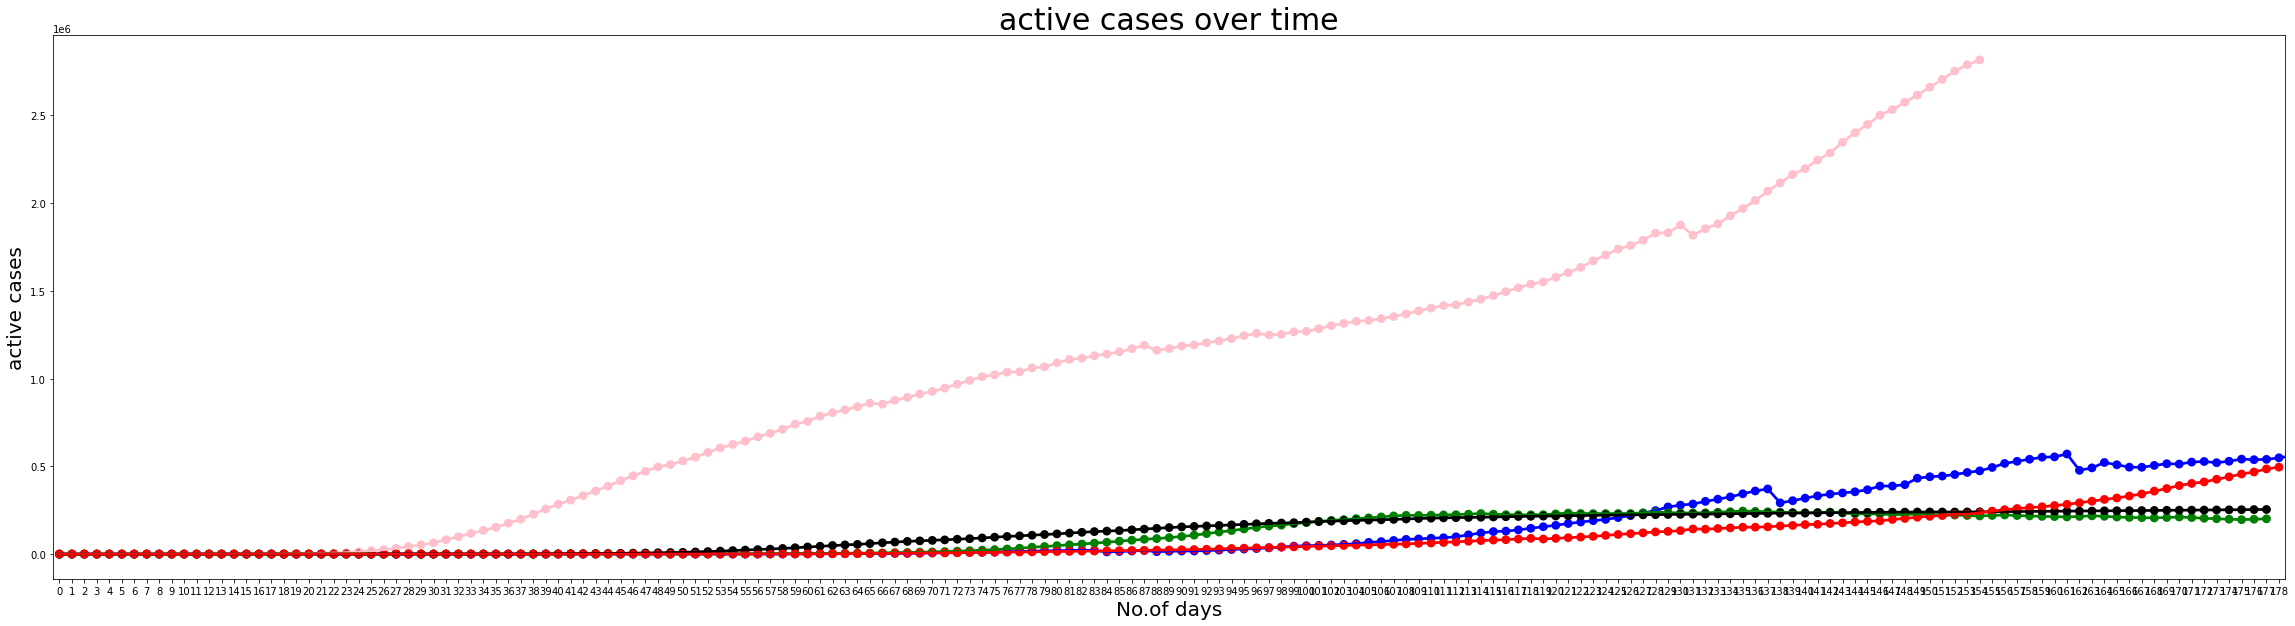

In [73]:
# active cases trend in top 5 countries
plt.figure(figsize=(40,10))
sns.pointplot(brazil.index,brazil.active,color="Blue")
sns.pointplot(us.index,us.active,color="Pink")
sns.pointplot(Russia.index,Russia.active,color="Green")
sns.pointplot(uk.index,uk.active,color="black")
sns.pointplot(india.index,india.active,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('active cases',fontsize=20)
plt.title('active cases over time',fontsize=30)
plt.show()

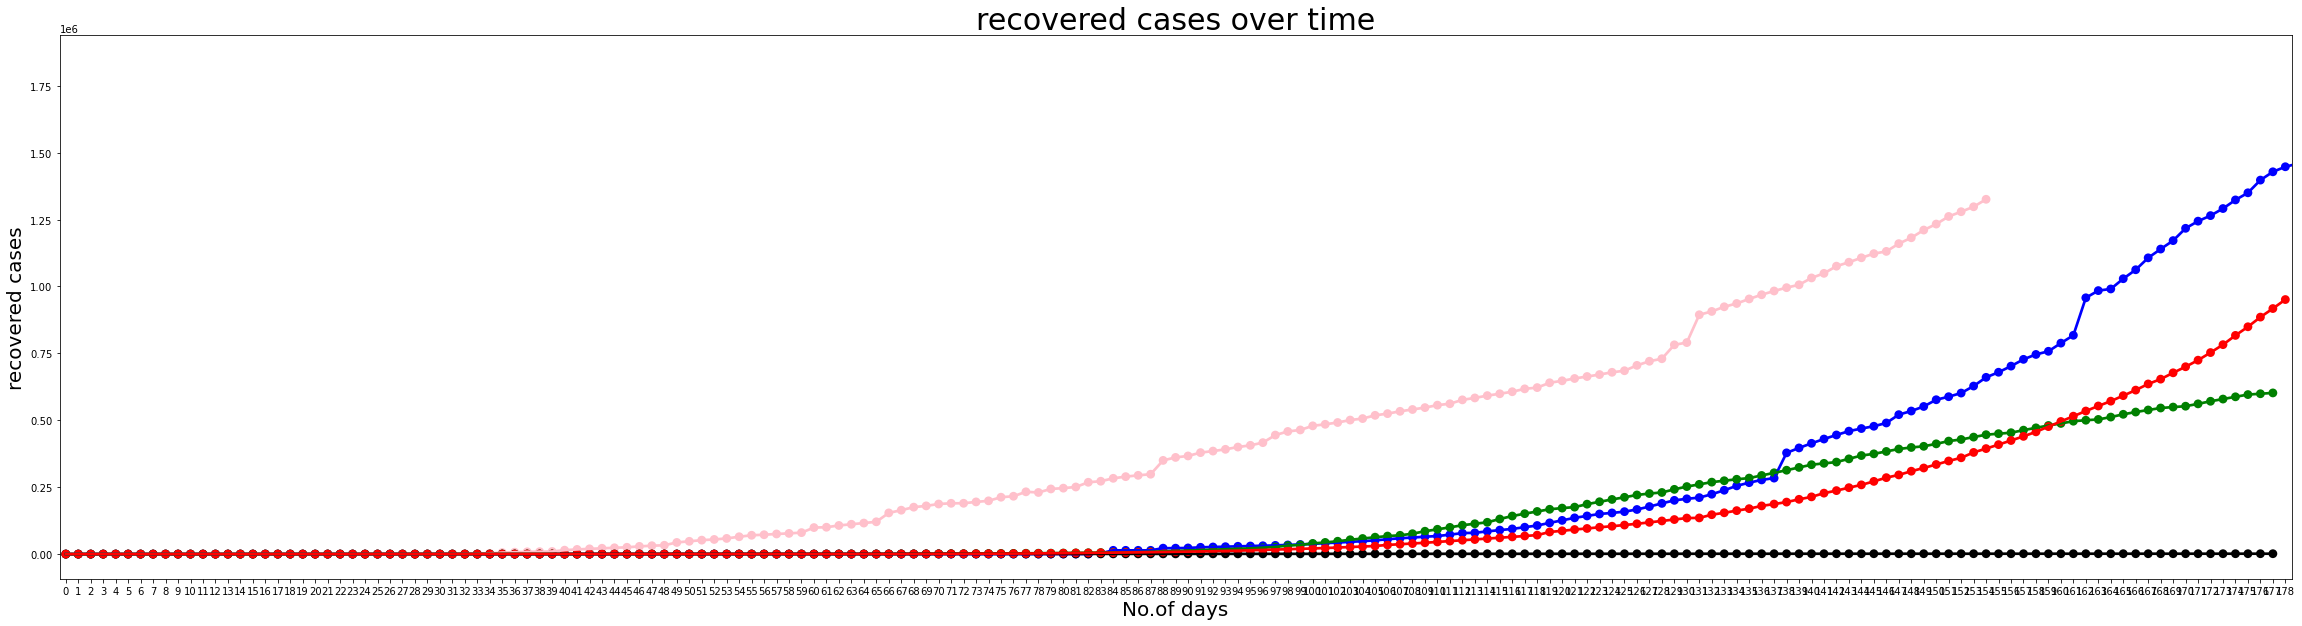

In [74]:
# recovered cases trend in top 5 countries
plt.figure(figsize=(40,10))
sns.pointplot(brazil.index,brazil.recovered,color="Blue")
sns.pointplot(us.index,us.recovered,color="Pink")
sns.pointplot(Russia.index,Russia.recovered,color="Green")
sns.pointplot(uk.index,uk.recovered,color="black")
sns.pointplot(india.index,india.recovered,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('recovered cases',fontsize=20)
plt.title('recovered cases over time',fontsize=30)
plt.show()

# Model building using Facebook Prophet library

In [75]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [77]:
from prophet import Prophet

In [78]:
data=pd.read_csv("covid_19_clean_complete.csv",parse_dates=["Date"])
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [79]:
data["Active"]=data["Confirmed"]-data["Deaths"]-data["Recovered"]

In [85]:
confirmed = data.groupby('Date').sum()['Confirmed'].reset_index()
deaths = data.groupby('Date').sum()['Deaths'].reset_index()
recovered = data.groupby('Date').sum()['Recovered'].reset_index()
# forecasting active cases as homework....
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [86]:
deaths

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [87]:
recovered

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [ ]:
# convert the column names to "ds" and "y"  ds(datastamp) and y(Target)
# its the basic requirement of fb prophet model to change column names

In [90]:
# For building a forecasting model using fbProphet library,
# there should be only 2 columns passed
# The column names should always be --> 'ds','y'
confirmed.columns=['ds','y']
confirmed ['ds']=pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [91]:
deaths.columns=['ds','y']
deaths['ds']=pd.to_datetime(deaths['ds'])
deaths.head()

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [92]:
recovered.columns=['ds','y']
recovered['ds']=pd.to_datetime(recovered['ds'])
recovered.head()

,ds,y
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52


# Making forecasting of confirmed cases

In [96]:
model=Prophet(interval_width=0.95)
model.fit(confirmed)
#model building is completed
future=model.make_future_dataframe(periods=7,freq="D")
future.tail(10)

22:54:31 - cmdstanpy - INFO - Chain [1] start processing
22:54:31 - cmdstanpy - INFO - Chain [1] done processing


,ds
185,2020-07-25
186,2020-07-26
187,2020-07-27
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [97]:
forecast=model.predict(future)

In [101]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,1.632008e+07,1.616231e+07,1.648498e+07
189,2020-07-29,1.652996e+07,1.636063e+07,1.669626e+07
190,2020-07-30,1.674387e+07,1.658311e+07,1.689857e+07
191,2020-07-31,1.695904e+07,1.678889e+07,1.712962e+07
192,2020-08-01,1.716673e+07,1.698558e+07,1.732802e+07
193,2020-08-02,1.736428e+07,1.719101e+07,1.753871e+07
194,2020-08-03,1.755891e+07,1.738131e+07,1.774619e+07


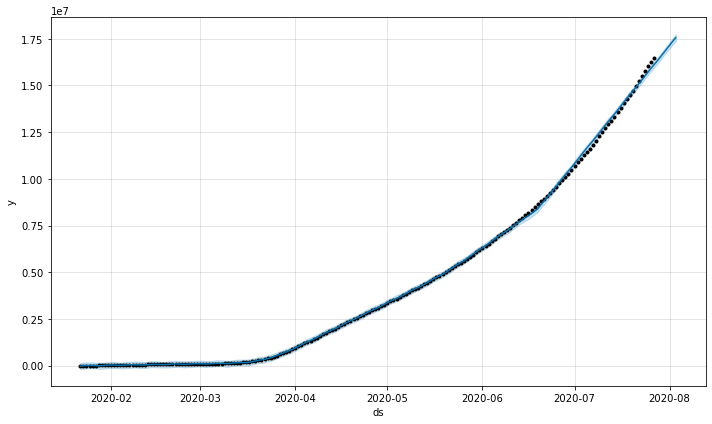

In [102]:
confirmed_forecasting_plot=model.plot(forecast)

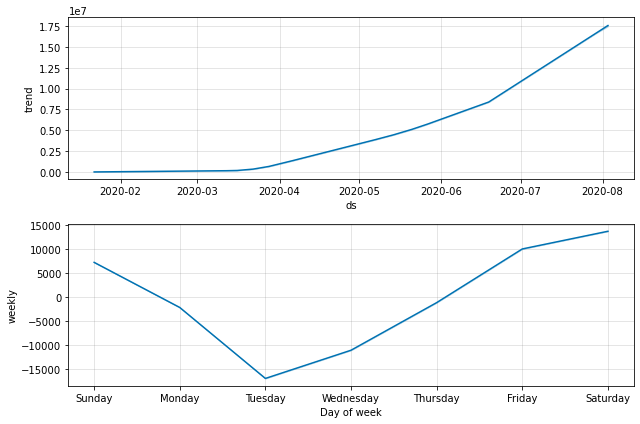

In [104]:
confirmed_forecasting_plot1=model.plot_components(forecast)

# Making forecasting of Death cases

In [105]:
m=Prophet(interval_width=0.95)
m.fit(deaths)
future=m.make_future_dataframe(periods=7)
future.tail(7)

23:04:39 - cmdstanpy - INFO - Chain [1] start processing
23:04:39 - cmdstanpy - INFO - Chain [1] done processing


,ds
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [106]:
forecast=m.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,663509.697722,660391.396623,666660.936257
191,2020-07-31,669026.358583,665633.588632,672573.181207
192,2020-08-01,673909.343577,669550.425251,677443.645813
193,2020-08-02,678047.385907,672896.869710,682076.251502
194,2020-08-03,682337.962852,676142.513816,687687.937773


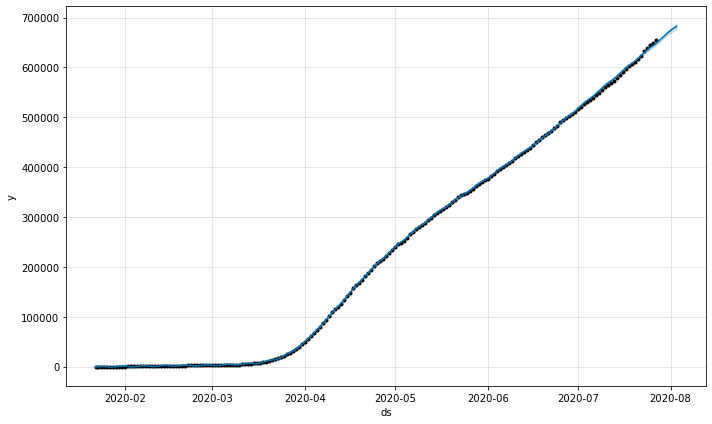

In [107]:
deaths_forecasting_plot=m.plot(forecast)

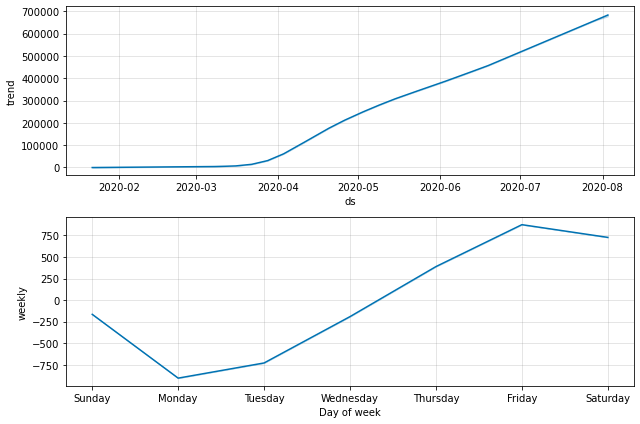

In [108]:
deaths_forecasting_plot1=m.plot_components(forecast)

In [ ]:
# same steps you have to repeat for recovery and active......HOmework